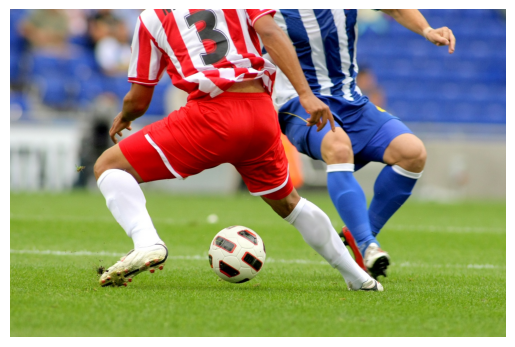

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import sys

img = cv.imread('./ch2_data/soccer.jpg')

if img is None:
    sys.exit('파일을 찾을 수 없습니다.')

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# matplotlib으로 이미지 출력
plt.imshow(img_rgb)
plt.axis('off') # 축 숨기기
plt.show()